In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
from pandas_datareader.data import DataReader
from datetime import datetime

In [ ]:

# Fetch stock data using yfinance
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
end = datetime.now()
start = datetime(end.year - 3, end.month, end.day)

# Download the stock data
stock_data = {}
for stock in tech_list:
    stock_data[stock] = yf.download(stock, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:

# Add company name column to each DataFrame
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]
for i, company in enumerate(tech_list):
    stock_data[company]["company_name"] = company_name[i]

# Combine all stock data into one DataFrame
df = pd.concat([stock_data[stock] for stock in tech_list], axis=0)


NameError: name 'company_name' is not defined

<Figure size 700x300 with 0 Axes>

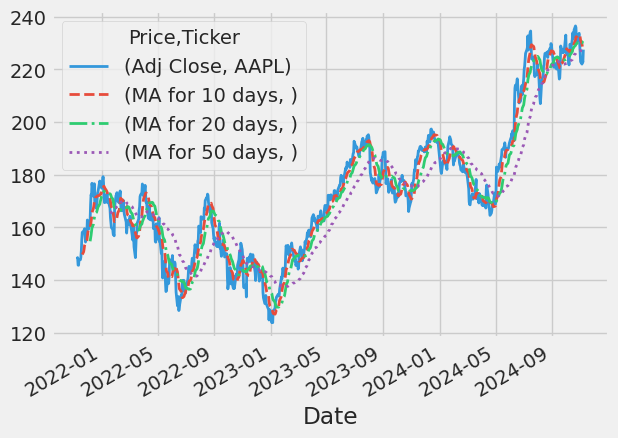

In [ ]:
ma_day = [10, 20, 50]
for ma in ma_day:
    for company in tech_list:
        stock_data[company][f"MA for {ma} days"] = stock_data[company]['Adj Close'].rolling(ma).mean()

# Improved plot style and color settings
custom_colors = ['#3498db', '#e74c3c', '#2ecc71', '#9b59b6']
line_styles = ['-', '--', '-.', ':']
    # Separate graphs for each company with aesthetic improvements
for i, company in enumerate(tech_list):
    plt.figure(figsize=(7, 3))  # Individual figure for each stock
    stock_data[company][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(
        color=[custom_colors[i], custom_colors[(i+1) % 4], custom_colors[(i+2) % 4], custom_colors[(i+3) % 4]],
        style=line_styles, linewidth=2.0)
    plt.title(f"{company_name[i]} Stock Prices and Moving Averages", fontsize=16, fontweight='bold')
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Stock Price (USD)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(loc='upper left', fontsize=10, frameon=True, shadow=True)
    plt.tight_layout()
    plt.show()




In [ ]:
# Prepare the data for LSTM Model
from sklearn.preprocessing import MinMaxScaler

# Use multiple features ('Adj Close', 'Open', 'High', 'Low', 'Volume') for Apple
data = stock_data['AAPL'][['Adj Close', 'Open', 'High', 'Low', 'Volume']]
dataset = data.values

# Split the dataset into training and testing sets
training_data_len = int(np.ceil(len(dataset) * .95))

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Create the training data set
train_data = scaled_data[0:training_data_len, :]


NameError: name 'stock_data' is not defined

In [ ]:
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, :])  # Use all columns as features
    y_train.append(train_data[i, 0])  # Predict 'Adj Close'

# Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data to 3D for LSTM input
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], x_train.shape[2]))


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# Initialize the model
model = Sequential()

# Adding the layers
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')


NameError: name 'x_train' is not defined

Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 126ms/step - loss: 0.0326 - val_loss: 0.0044
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - loss: 0.0046 - val_loss: 0.0066
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - loss: 0.0037 - val_loss: 0.0097
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - loss: 0.0041 - val_loss: 0.0045
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 178ms/step - loss: 0.0033 - val_loss: 0.0062
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - loss: 0.0033 - val_loss: 0.0046
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - loss: 0.0033 - val_loss: 0.0076
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - loss: 0.0030 - val_loss: 0.0048
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - loss: 0.0029 - val_loss: 0.0052
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 185ms/step - loss: 0.0029 - val_loss: 0.0040
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - loss: 0.0023 - val_loss: 0.0047
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step

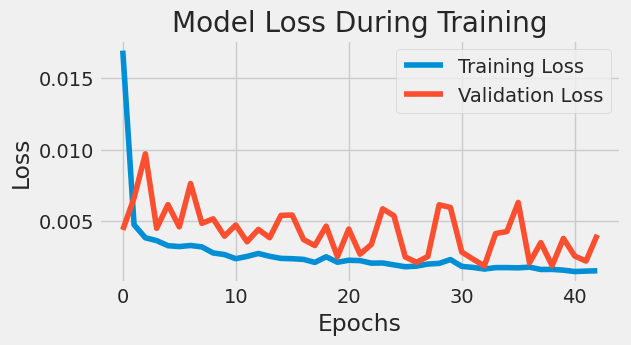

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)

# Train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=50, validation_split=0.2, callbacks=[early_stop])

# Plot the loss function
plt.figure(figsize=(6,3))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = dataset[training_data_len:, 0]  # Real 'Adj Close' values
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, :])

# Convert to numpy array
x_test = np.array(x_test)

# Reshape the data to 3D
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], x_test.shape[2]))


In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(np.concatenate([predictions, np.zeros((predictions.shape[0], dataset.shape[1]-1))], axis=1))[:,0]

# Evaluate the model using RMSE
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print(f'Root Mean Squared Error: {rmse}')
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
from sklearn.metrics import mean_squared_error

# Calculate the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse = mean_squared_error(valid['Adj Close'], valid['Predictions'])
rmse = np.sqrt(mse)

# Print the MSE and RMSE values
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')

# Calculate the mean of the actual stock prices
mean_actual = valid['Adj Close'].mean()

# Calculate percentage accuracy
accuracy = 100 - ((rmse / mean_actual) * 100)
print(f'Accuracy: {accuracy:.2f}%')



# Display the actual and predicted prices
print(valid[['Adj Close', 'Predictions']])


NameError: name 'model' is not defined

In [ ]:
# Visualize residuals (Actual - Predicted)
residuals = y_test - predictions
plt.figure(figsize=(6,3))
plt.hist(residuals, bins=50, color='purple')
plt.title('Residual Distribution (Actual - Predicted)')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

In [ ]:
plt.figure(figsize=(6,3))
plt.plot(residuals, label='Residuals', color='purple')
plt.title('Residuals Over Time')
plt.xlabel('Days')
plt.ylabel('Residual (Actual - Predicted)')
plt.legend()
plt.show()


In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(6, 3))
plt.title(' Stock Price Prediction with Multiple Features')
plt.plot(train['Adj Close'], label='Training Data')
plt.plot(valid[['Adj Close', 'Predictions']], label='Validation and Predictions')
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.xticks(rotation=45)
plt.show()

In [ ]:
plt.figure(figsize=(14,2))
plt.plot(valid['Adj Close'], label="Actual Close Price", color='black')
plt.plot(valid['Predictions'], label="Predicted Close Price", color='red', linestyle='--')
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price USD ($)')
plt.legend(loc='lower right')
plt.xticks(rotation=45)
plt.show()
from sklearn.metrics import mean_squared_error

# Calculate the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse = mean_squared_error(valid['Adj Close'], valid['Predictions'])
rmse = np.sqrt(mse)

# Print the MSE and RMSE values
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
mean_actual = valid['Adj Close'].mean()

# Calculate percentage accuracy
accuracy = 100 - ((rmse / mean_actual) * 100)
print(f'Accuracy: {accuracy:.2f}%')



# Display the actual and predicted prices
print(valid[['Adj Close', 'Predictions']])